In [1]:
import os
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.rcParams['lines.linewidth'] = 0.8
# plt.rcParams['lines.markersize'] = 4.0
# plt.rcParams['figure.figsize'] = 20, 10

In [2]:
csv_path = "./csv/preprocess_3.csv"
# csv_path = "/home/icer/Project/icer/openface/data/preprocess_araki.csv"
df = pd.read_csv(csv_path, engine='python')

"""
データの順番
/home/icer/Videos/Webcam/processed_data/nod2-2.csv
/home/icer/Videos/Webcam/processed_data/other2-2.csv
/home/icer/Videos/Webcam/processed_data/nod2-1.csv
/home/icer/Videos/Webcam/processed_data/other2-1.csv
/home/icer/Videos/Webcam/processed_data/other2-3.csv
/home/icer/Videos/Webcam/processed_data/nod2-3.csv
"""

'\nデータの順番\n/home/icer/Videos/Webcam/processed_data/nod2-2.csv\n/home/icer/Videos/Webcam/processed_data/other2-2.csv\n/home/icer/Videos/Webcam/processed_data/nod2-1.csv\n/home/icer/Videos/Webcam/processed_data/other2-1.csv\n/home/icer/Videos/Webcam/processed_data/other2-3.csv\n/home/icer/Videos/Webcam/processed_data/nod2-3.csv\n'

In [3]:
df['label'].astype(int)
cl0 = (df['label'] == 0)
cl1 = (df['label'] == 1)
print(f"cl0: {cl0.sum()}, cl1: {cl1.sum()}")
print(f"cl0: {cl0.sum()/(cl0.sum() + cl1.sum())}, cl1: {cl1.sum()/(cl0.sum() + cl1.sum())}")

df

cl0: 223, cl1: 146
cl0: 0.6043360433604336, cl1: 0.3956639566395664


,mean_x,std_x,mad_x,max_x,min_x,energy_x,entropy_x,iqr_x,range_x,skewness_x,...,entropy_z,iqr_z,range_z,skewness_z,kurtosis_z,frame_in,frame_out,timestamp_in,timestamp_out,label
0,-0.118125,0.057919,0.0320,-0.048,-0.279,0.017308,3.375151,0.06200,0.231,-1.231217,...,2.883266,0.03125,0.111,1.511576,1.919323,1.0,32.0,0.000,1.033,0.0
1,-0.246781,0.098006,0.0585,-0.107,-0.348,0.070506,2.909785,0.20825,0.241,0.309083,...,3.146227,0.11875,0.149,-0.180340,-1.719563,17.0,48.0,0.533,1.567,0.0
2,-0.359563,0.029689,0.0170,-0.298,-0.409,0.130167,3.239766,0.04125,0.111,-0.077204,...,3.241502,0.02725,0.046,-0.023527,-1.337478,33.0,64.0,1.067,2.100,0.0
3,-0.389344,0.016110,0.0060,-0.346,-0.409,0.151848,3.163213,0.01275,0.063,1.432788,...,3.180612,0.01475,0.040,0.848896,-0.296338,49.0,80.0,1.600,2.633,0.0
4,-0.387625,0.009249,0.0065,-0.373,-0.404,0.150339,3.284732,0.01750,0.031,0.111480,...,3.269130,0.00425,0.027,1.557308,3.044151,65.0,96.0,2.133,3.167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.372719,0.090501,0.0440,0.483,0.170,0.147110,3.323346,0.10750,0.313,-1.024748,...,3.353241,0.06225,0.306,-1.449322,0.638994,897.0,928.0,29.867,30.900,1.0
365,0.079656,0.294186,0.2615,0.448,-0.436,0.092890,3.257225,0.53725,0.884,-0.296952,...,3.031869,0.04400,0.076,0.742474,-0.999677,913.0,944.0,30.400,31.433,1.0
366,-0.161844,0.156705,0.1095,0.142,-0.436,0.050750,3.264262,0.18600,0.578,-0.022217,...,3.227693,0.03300,0.072,0.193569,-0.905837,929.0,960.0,30.933,31.967,1.0
367,-0.070281,0.128586,0.0745,0.083,-0.400,0.021474,3.365755,0.20175,0.483,-0.873963,...,3.167431,0.03800,0.059,0.292120,-1.327903,945.0,976.0,31.467,32.500,1.0


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
print(f"欠損値:\n{df.isnull().sum()}")
data = df.dropna(axis=1, how="any")

X = data.iloc[:, :-5]
y = data["label"].astype(int)

欠損値:
mean_x           0
std_x            0
mad_x            0
max_x            0
min_x            0
energy_x         0
entropy_x        0
iqr_x            0
range_x          0
skewness_x       0
kurtosis_x       0
mean_y           0
std_y            0
mad_y            0
max_y            0
min_y            0
energy_y         0
entropy_y        0
iqr_y            0
range_y          0
skewness_y       0
kurtosis_y       0
mean_z           0
std_z            0
mad_z            0
max_z            0
min_z            0
energy_z         0
entropy_z        0
iqr_z            0
range_z          0
skewness_z       0
kurtosis_z       0
frame_in         0
frame_out        0
timestamp_in     0
timestamp_out    0
label            0
dtype: int64


In [5]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# RandomForestRegressorでBorutaを実行
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
feat_selector.fit(X.values, y.values)

# 選択された特徴量を確認
selected = feat_selector.support_
print('選択された特徴量の数: %d' % np.sum(selected))
print(selected)
print(X.columns[selected])

X_selected = X.iloc[:,feat_selector.support_]

選択された特徴量の数: 7
[False False  True  True False False  True  True  True False False False
 False False False  True False False False False False False False False
 False False False False False False False False  True]
Index(['mad_x', 'max_x', 'entropy_x', 'iqr_x', 'range_x', 'min_y',
       'kurtosis_z'],
      dtype='object')


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

random_state = 0

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=random_state)
X_train, X_test = X_selected[142:], X_selected[0:142]
y_train, y_test = y[142:], y[0:142]

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# kernel SVMのインスタンスを生成
model = SVC(kernel='rbf', random_state=random_state)

# モデルの学習
model.fit(X_train_std, y_train)

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
precision_train = precision_score(y_train, pred_train)
recall_train = recall_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)
print('トレーニングデータに対する適合率： %.2f' % precision_train)
print('トレーニングデータに対する再現率： %.2f' % recall_train)
cm = confusion_matrix(y_train, pred_train)
print(cm)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)
print('テストデータに対する適合率： %.2f' % precision_test)
print('テストデータに対する再現率： %.2f' % recall_test)

cm = confusion_matrix(y_test, pred_test)
print(cm)

トレーニングデータに対する正解率： 0.98
トレーニングデータに対する適合率： 0.97
トレーニングデータに対する再現率： 1.00
[[ 77   4]
 [  0 146]]
テストデータに対する正解率： 0.86
テストデータに対する適合率： 0.00
テストデータに対する再現率： 0.00
[[122  20]
 [  0   0]]


/home/honda/anaconda3/envs/ml-ng/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
def output_csv(
    base_df: pd.core.frame.DataFrame,
    pred_result: np.ndarray,
    columns: list=['frame_in', 'frame_out', 'label'],
    output_path: str="output_pred.csv"
):
    """
    base_df: predに対応するDataFrame
    pred_result: 判別後の予測結果 (ndarray)
    columns: outputするカラム名のリスト
    """
    base_df = base_df[columns]
    base_df = base_df.assign(pred=pred_result)
    
    frame_in = base_df["frame_in"].iloc[0].astype(int)
    frame_out = base_df["frame_out"].iloc[-1].astype(int)
    cum_pred = np.zeros(frame_out - frame_in)

    out_df = pd.DataFrame(columns=['frame', 'label', 'pred'])

    for i, (_, row) in enumerate(base_df.iterrows()):
        fin = row['frame_in'].astype(int)
        fout = row['frame_out'].astype(int)

        for frame in range(fin, fout + 1):
            if (out_df['frame'] == frame).sum() == 0:
                out_df = out_df.append({
                    'frame': frame,
                    'label': row['label'],
                    'pred': row['pred'],
                }, ignore_index=True)
            else:
                if row['pred'] == 1:
                    out_df.loc[out_df['frame'] == frame, 'pred'] += 1
                    
    if output_path is not None:
        out_df.to_csv(output_path, index=False)

    return out_df


test_df0 = df[0:61]
pred_test0 = pred_test[0:61]
test_df1 = df[61:142]
pred_test1 = pred_test[61:142]
    
out_df0 = output_csv(test_df0, pred_test0, output_path="output_pred0.csv")
out_df1 = output_csv(test_df1, pred_test1, output_path="output_pred1.csv")
print((out_df0['pred'] == 2).sum())
print((out_df1['pred'] == 2).sum())

32
80


In [8]:
import cv2
import tqdm
from typing import Tuple


def get_video_capture(video_path: str) -> cv2.VideoCapture:
    return cv2.VideoCapture(video_path)


def get_video_length(video_path: str) -> int:
    video_capture = get_video_capture(video_path)
    return int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))


def get_frame_position(video_capture: cv2.VideoCapture) -> int:
    return int(video_capture.get(cv2.CAP_PROP_POS_FRAMES))


def set_frame_position(video_capture: cv2.VideoCapture, position: int) -> int:
    return int(video_capture.set(cv2.CAP_PROP_POS_FRAMES, position))


def get_video_dimension(video_path: str) -> Tuple[int, int]:
    video_capture = get_video_capture(video_path)
    return int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))


def get_video_framerate(video_path: str) -> float:
    video_capture = get_video_capture(video_path)
    return float(video_capture.get(cv2.CAP_PROP_FPS))


def output_video_nod(nod_df, video_path: str, output_path: str = "output_video_nod"):
    video_capture = get_video_capture(video_path)
    video_length = get_video_length(video_path)

    print(nod_df)
    start, end = nod_df['frame'].iloc[0].astype(int), nod_df['frame'].iloc[-1].astype(int)
#     bar = tqdm.tqdm(total=end - start)

    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    video_writer = cv2.VideoWriter(output_path, fourcc, get_video_framerate(video_path),
                                   get_video_dimension(video_path))

    frame_index = start
    set_frame_position(video_capture, start)  # Move position
    while video_capture.isOpened() and get_frame_position(video_capture) in range(start, end):
        ret, frame = video_capture.read()
#         # Progress
#         bar.update(1)
#         bar.refresh()

        nod = nod_df[nod_df['frame'] == frame_index]['pred'].values[0]

        # BBox
        left, top = 200, 200
        right, bottom = 400, 400
        p1 = (left, top)
        p2 = (right, bottom)
        texts = {0: "No", 1: "Nod", 2: "Nod!!!"}

        # Draw circle when nod flag == 1 or 2
        if nod > 0:
            mid = (np.array(p1) + np.array(p2)) // 2
#             frame = cv2.circle(frame, tuple(mid), radius=100, color=(0, 0, 255), thickness=int(1 * nod))


            frame = cv2.putText(frame, texts[nod], (50, 50), cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 255), 5, cv2.LINE_AA)

        video_writer.write(frame)
        frame_index += 1

    video_capture.release()
    video_writer.release()

# nod_df = out_df0
# video_path = "/home/icer/Videos/Webcam/processed_data/nod2-2.avi"
# output_path = "pred_nod2-2.mp4"

nod_df = out_df1
video_path = "/home/icer/Videos/Webcam/processed_data/other2-2.avi"
output_path = "pred_other2-2.mp4"
output_video_nod(nod_df, video_path, output_path)

       frame  label  pred
0     1201.0    0.0   0.0
1     1202.0    0.0   0.0
2     1203.0    0.0   0.0
3     1204.0    0.0   0.0
4     1205.0    0.0   0.0
...      ...    ...   ...
1291  1196.0    0.0   0.0
1292  1197.0    0.0   0.0
1293  1198.0    0.0   0.0
1294  1199.0    0.0   0.0
1295  1200.0    0.0   0.0

[1296 rows x 3 columns]


[0, 67, 142, 199, 280, 311]


array([0., 1., 1., ..., 1., 1., 1.])

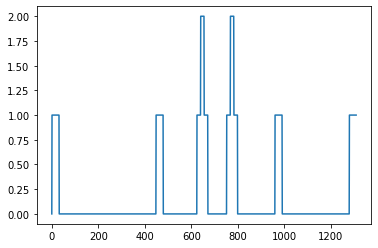

In [9]:
# 各動画の開始行indexを取得
vid_index_list = df.index[df['timestamp_in'] == 0].tolist()
print(vid_index_list)

result0_pred = pred_test[vid_index_list[0] : vid_index_list[1]]
result0_df = df.iloc[vid_index_list[0]:vid_index_list[1]]
# result0_df.iloc[0]
framein = result0_df["frame_in"].iloc[0].astype(int)
frameout = result0_df["frame_out"].iloc[-1].astype(int)

result0 = np.zeros(frameout - framein)

for i, (_, data) in enumerate(result0_df.iterrows()):
    pred = result0_pred[i]

    if pred == 1:
        fin = data["frame_in"].astype(int)
        fout = data["frame_out"].astype(int)
        result0[fin:fout] += 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result0)
result0